### Project Name: Advanced Statistics
### Compiled By: Ajay Kumar

# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from statsmodels.formula.api import ols # for n-way ANOVA
from statsmodels.stats.anova import _get_covariance, anova_lm # for n-way ANOVA
%matplotlib inline

# Loading the dataset CSV file

## Problem 1:

In [2]:
fever = pd.read_csv('Fever.csv')

# Checking the top 5 records

In [3]:
fever.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

# Checking the shape and information of the dataframe

In [4]:
fever.shape

(36, 4)

In [5]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


# Checking the null and duplicates values of the dataframe

In [6]:
fever.isnull().sum().any()

False

In [7]:
fever.duplicated().sum()

0

# Checking the summary of the dataframe

In [8]:
fever.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

# 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

## Null and Alternate hypothesis for variable A (Statement and Statistical form)

$H_0$ : The means of 'Relief' variable with respect to each category of A is equal.

$H_1$ : At least one of the means of 'Relief' variable with respect to each category of A is unequal.

# OR

$H_0$ : $\mu$ = $\mu1$ = $\mu2$ = $\mu3$

$H_1$ : $\mu$ ≠ $\mu1$ ≠ $\mu2$ ≠ $\mu3$

## Null and Alternate hypothesis for variable B (Statement and Statistical form

$H_0$ : The means of 'Relief' variable with respect to each category of B is equal.

$H_1$ : At least one of the means of 'Relief' variable with respect to each category of B is unequal.

# OR

$H_0$ : $\mu$ = $\mu1$ = $\mu2$ = $\mu3$

$H_1$ : $\mu$ ≠ $\mu1$ ≠ $\mu2$ ≠ $\mu3$

# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

### Checking distinct values of Design of variable A

In [9]:
fever['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [10]:
fever.A = pd.Categorical(fever.A)

# One-way ANOVA

## Variable A vs Relief

$H_0$ : The means of 'Relief' variable with respect to each category of A is equal.

$H_1$ : At least one of the means of 'Relief' variable with respect to each category of A is unequal.

In [11]:
formula = 'Relief ~ C(A)'
model = ols(formula, fever).fit()
anova_table = anova_lm(model)
print(anova_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


`pvalue`=4.578242e-07 is less than the level of significance $\alpha$ 0.05

`The null hypothesis is rejected based on the above observation and it is concluded that the mean average is not equal for each category of A`

# 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

### Checking distinct values of Design of variable B

In [12]:
fever['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [13]:
fever.B = pd.Categorical(fever.B)

# One-way ANOVA

## Variable B vs Relief

$H_0$ : The means of 'Relief' variable with respect to each category of B is equal.

$H_1$ : At least one of the means of 'Relief' variable with respect to each category of B is unequal.

In [14]:
formula = 'Relief ~ C(B)'
model = ols(formula, fever).fit()
anova_table = anova_lm(model)
print(anova_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


`pvalue`= 0.00135 is less than the level of significance $\alpha$ 0.05

`The null hypothesis is rejected based on the above observation and it is concluded that the mean average is not equal for each category of B`

# 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]


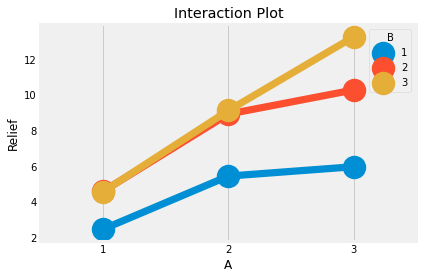

In [18]:
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=fever)
plt.title('Interaction Plot')
plt.grid()
plt.show()

# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

# Two-way ANOVA

$H_0$ : The means of 'Relief' variable with respect to both category of A and B is equal.

$H_1$ : At least one of the means of 'Relief' variable with respect to each category of A and B is unequal.

In [19]:
#Interaction Effect Model
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, fever).fit()
anova_table = anova_lm(model, typ =3 )
print(anova_table)

              sum_sq    df           F        PR(>F)
Intercept  24.502500   1.0  407.118462  8.145035e-18
C(A)       28.501667   2.0  236.783077  7.597677e-18
C(B)       11.901667   2.0   98.875385  3.762225e-13
C(A):C(B)  29.425000   4.0  122.226923  6.972083e-17
Residual    1.625000  27.0         NaN           NaN


`pvalue`= 6.972083e-17 is less than the level of significance $\alpha$ 0.05

`As variable A and B interaction is 6.972083e-17 which is >0.05 , there seems to be no statistically significant interaction between these two factors as far as Relief is concerned.`

# 1.6) Mention the business implications of performing ANOVA for this particular case study.

## Final conclusions:

Sample taken by research laboratory for new compound for the relief of severe cases of hay fever on 36 volunteers for each category of Two variables is not giving same result as the P values obtained by conducting One-way and Two-way ANOVA test is less than the level of significance alpha 0.05. Therefore, Research company has to conduct the research again for claiming that ‘Relief’ products has same result. 


# Problem 2

### Loading the dataset CSV file

In [20]:
data = pd.read_csv('Education+-+Post+12th+Standard.csv')

## Checking top 5 records

In [21]:
data.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

## Checking shape and information of Dataset

In [22]:
data.shape

(777, 18)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

## Checking the summary of the dataframe

In [24]:
data.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

## Checking null and missing values

In [25]:
data.isnull().sum().any()

False

In [26]:
data.duplicated().sum()

0

# 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Univariate Analysis

In [27]:
data_enroll = data['Enroll']

In [28]:
len(data_enroll)

777

(array([324., 197.,  80.,  43.,  33.,  27.,  11.,  19.,   5.,  11.,  11.,
          5.,   0.,   1.,   3.,   1.,   1.,   1.,   2.,   2.]),
 array([  35.  ,  352.85,  670.7 ,  988.55, 1306.4 , 1624.25, 1942.1 ,
        2259.95, 2577.8 , 2895.65, 3213.5 , 3531.35, 3849.2 , 4167.05,
        4484.9 , 4802.75, 5120.6 , 5438.45, 5756.3 , 6074.15, 6392.  ]),
 <BarContainer object of 20 artists>)

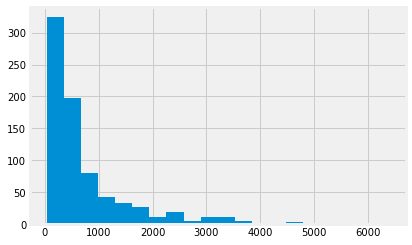

In [29]:
plt.hist(data_enroll, bins=20)

**In the above histogram, the first array is the frequency in each class and the second array contains the edges of the class intervals. These arrays can be assigned to a variable and used for further analysis.**

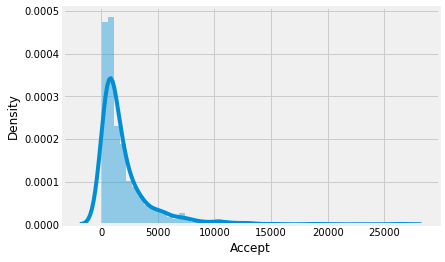

In [32]:
sns.distplot(data['Accept']);

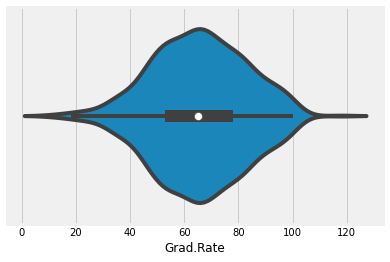

In [33]:
sns.violinplot(data['Grad.Rate']);

### Distribution by plotting a simple histogram with 10 bins and displaying mean, median and mode

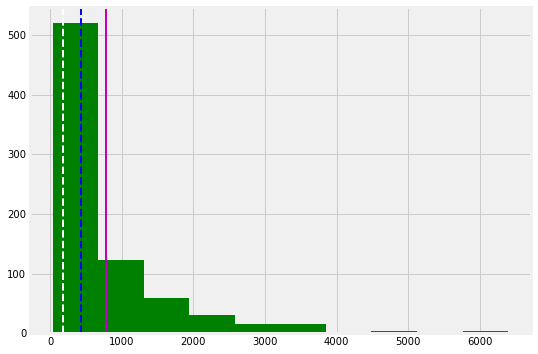

In [34]:
plt.figure(figsize=(8,6)) # makes the plot wider
plt.hist(data_enroll, color='g') # plots a simple histogram
plt.axvline(data_enroll.mean(), color='m', linewidth=2)
plt.axvline(data_enroll.median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(data_enroll.mode()[0], color='w', linestyle='dashed', linewidth=2)

### Cumulative Distribution

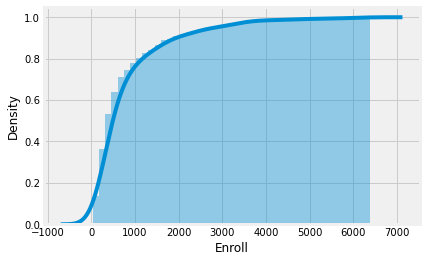

In [35]:
sns.distplot(data_enroll, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True));

### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Multivariate analysis

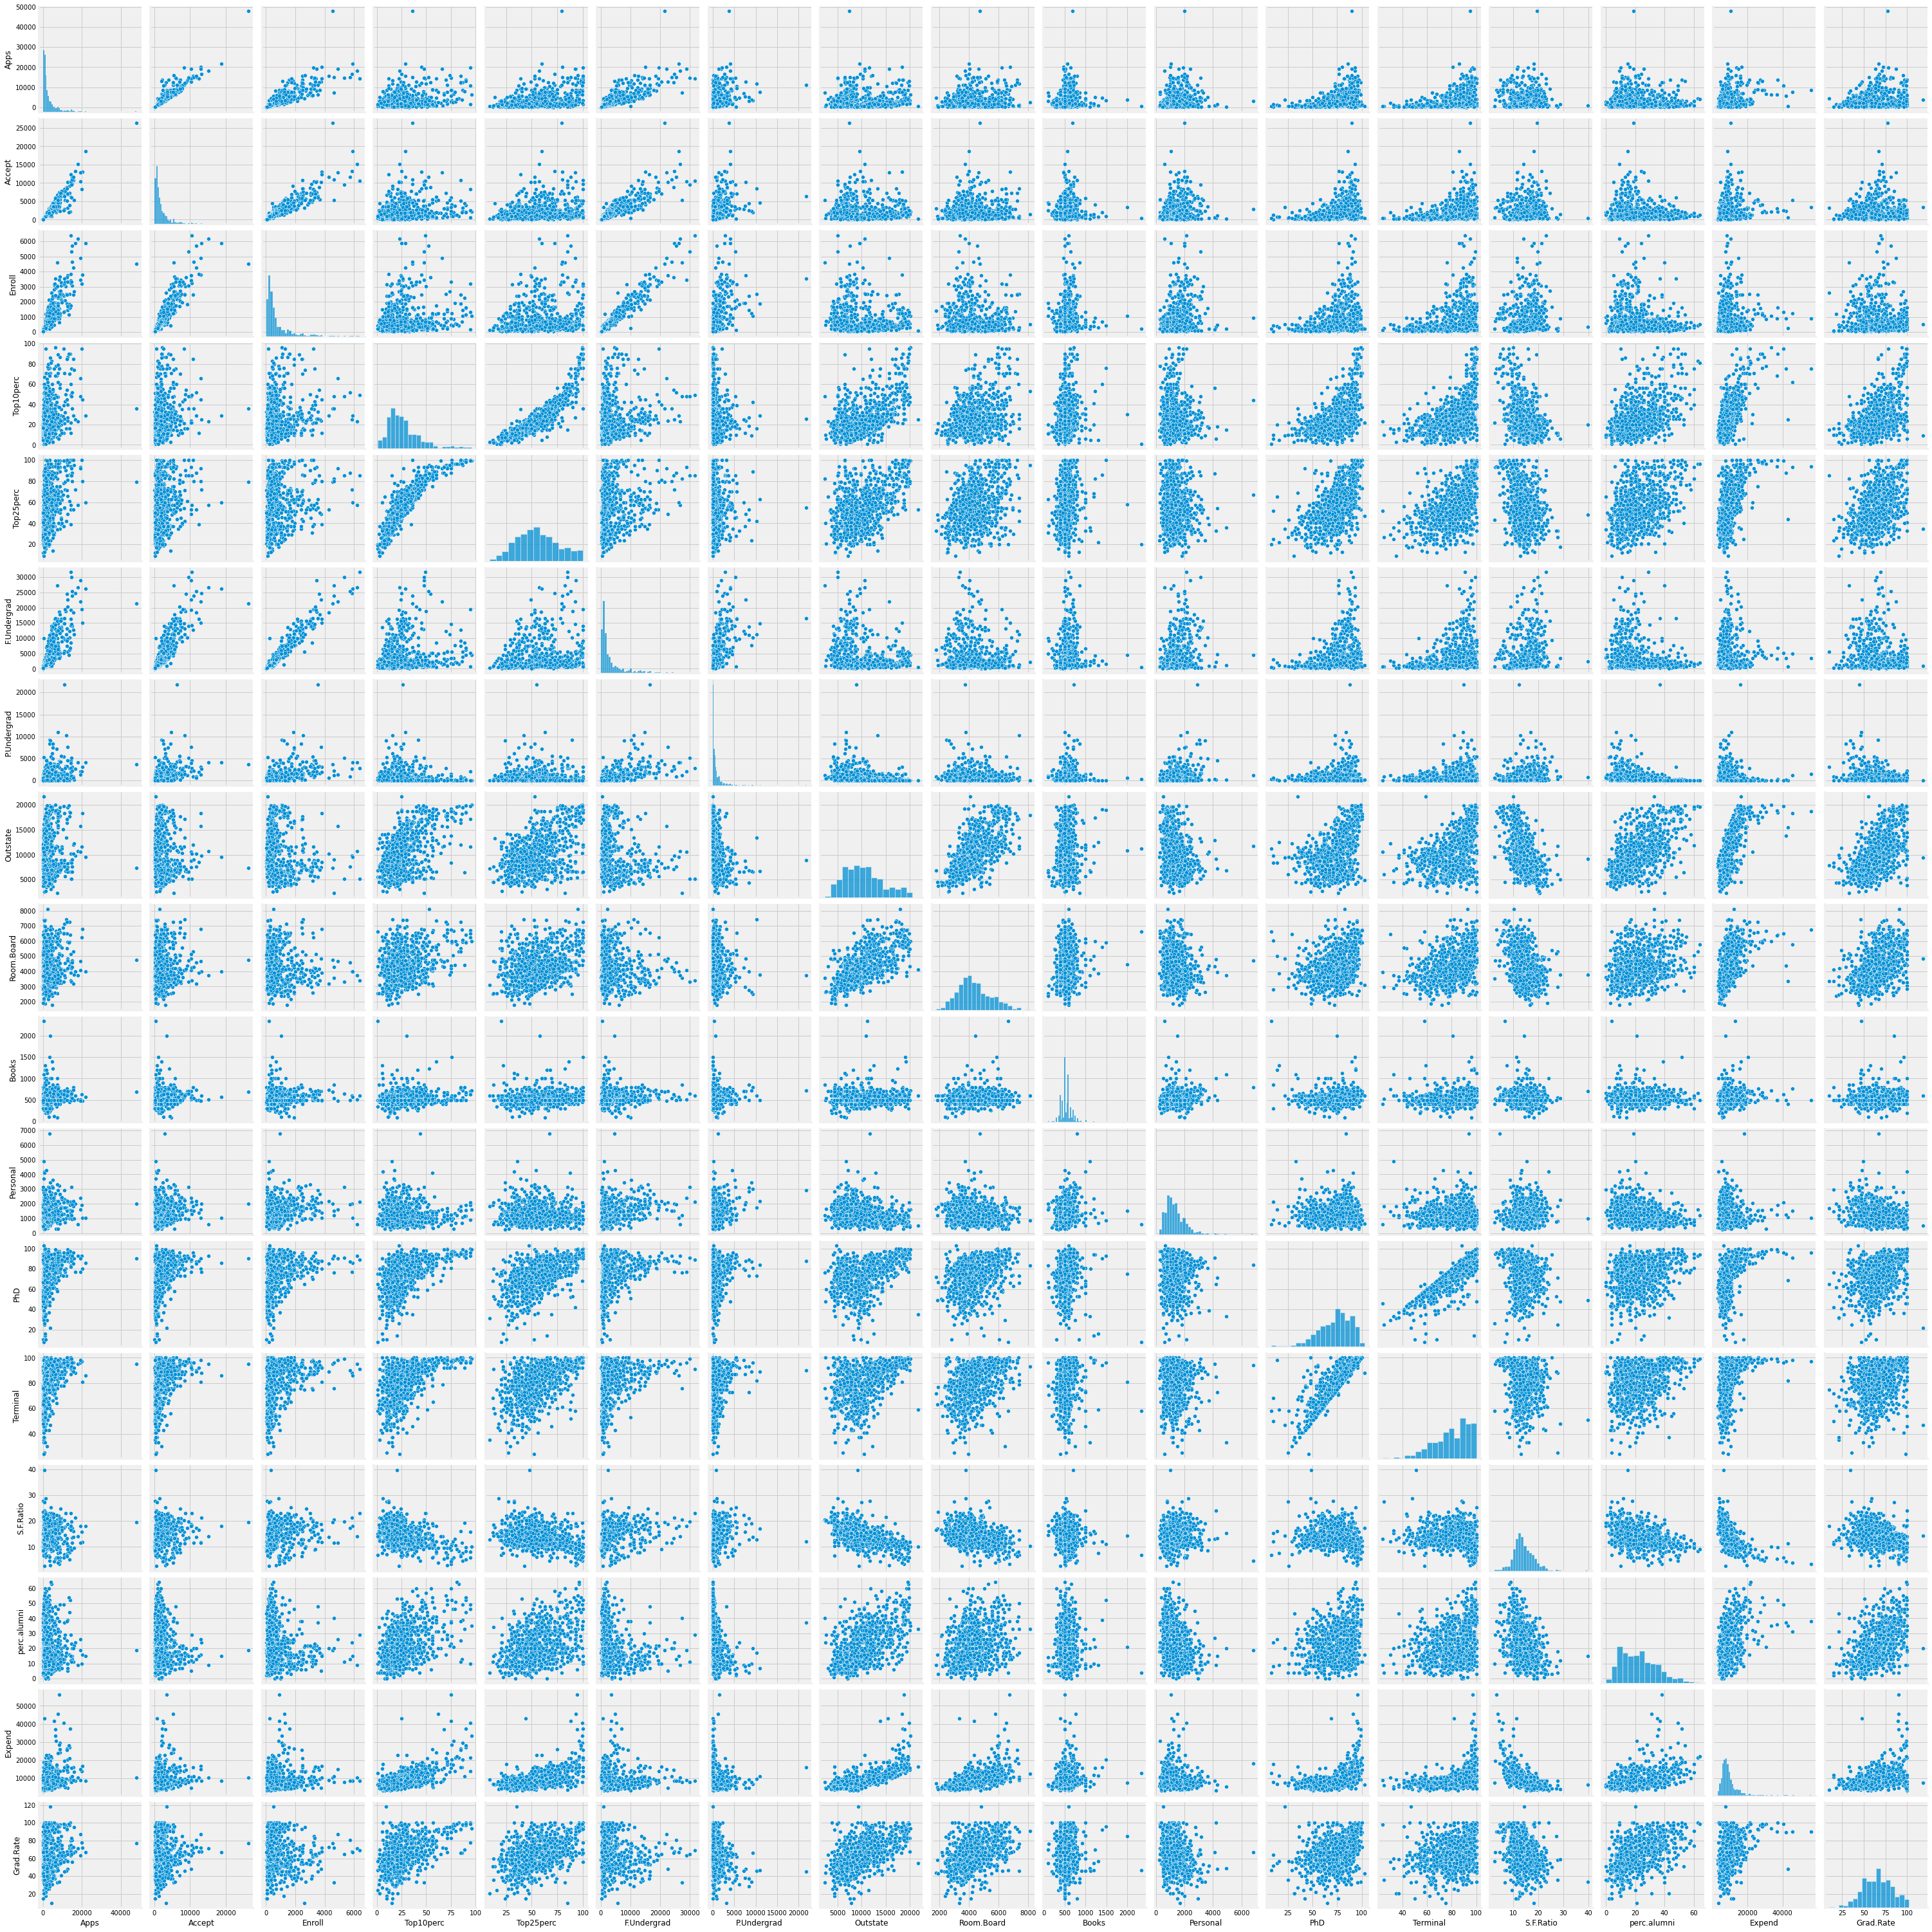

In [36]:
sns.pairplot(data)

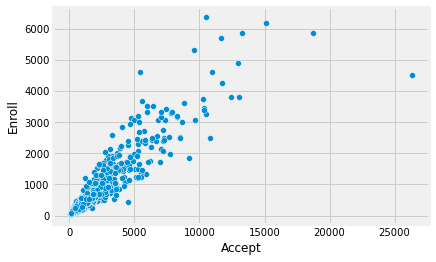

In [37]:
sns.scatterplot(data['Accept'], data['Enroll']);

<AxesSubplot:>

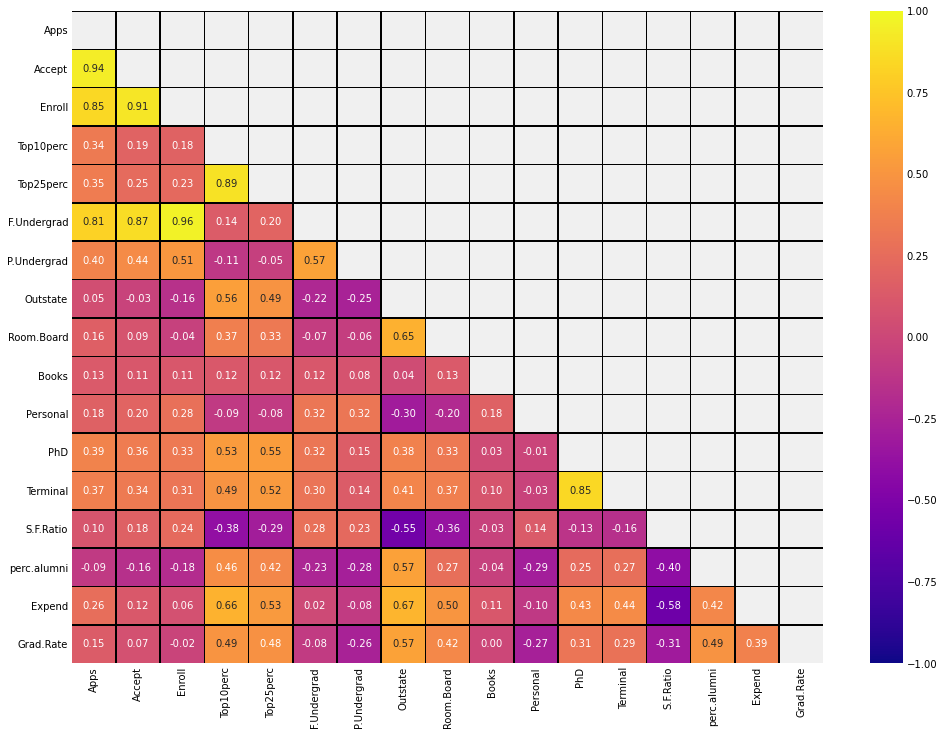

In [38]:
plt.figure(figsize=(15,12))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, vmax=1,vmin=-1, cmap='plasma', mask=matrix,fmt='0.2f',linecolor='black',linewidths=0.5)

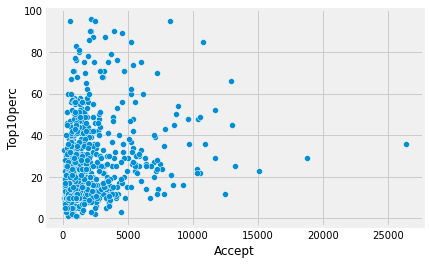

In [39]:
sns.scatterplot(data['Accept'], data['Top10perc'], palette='Set2');

# 2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 


### Checking the outliers before scaling

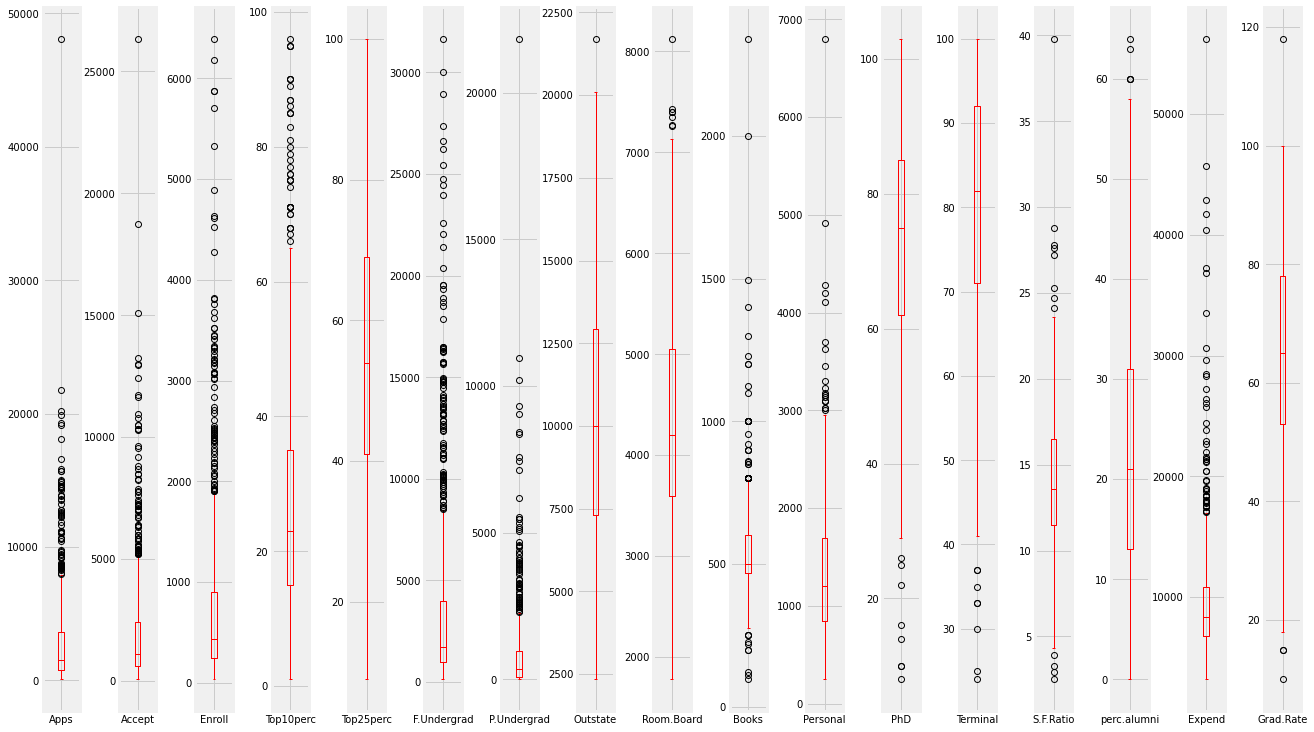

In [40]:
data.iloc[:,1:19].plot(kind = 'box', subplots = True,
       figsize = (18,10), color = 'red'); 
plt.tight_layout(pad=0.1, h_pad=0.5)
plt.show()

### Removing outliers using loop 

In [41]:
# Function to calculate the Q1 and Q3 values & Outlier limits
def ol_limits(col):
    # sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [42]:
# Outlier treatment using Loop
OL_cols=['Apps','Accept','Enroll','Top10perc','Top25perc','F.Undergrad',
        'P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate']

for col in OL_cols:
    lr,ur = ol_limits(data[col])
    data[col] = np.where(data[col] > ur, ur, data[col])
    data[col] = np.where(data[col] < lr, lr, data[col])

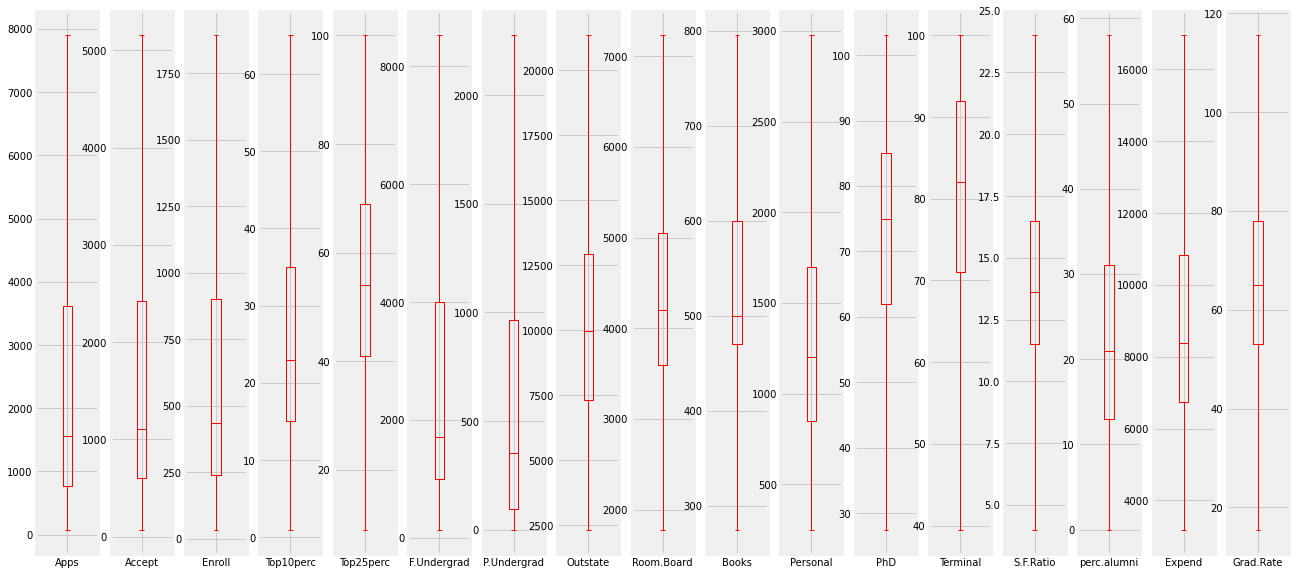

In [43]:
data.iloc[:,1:].plot(kind = 'box', subplots = True,
                  figsize = (20,10), color = 'red');

We can see that after capping there are no more outliers for any of the variables.

## Scaling the dataset to remove the variability and multicolinearity using StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])

In [45]:
np.round(scaled_data,2)

array([[-0.38, -0.34,  0.11, ..., -0.87, -0.63, -0.32],
       [-0.16,  0.12, -0.26, ..., -0.55,  0.4 , -0.55],
       [-0.47, -0.43, -0.57, ...,  0.59, -0.13, -0.67],
       ...,
       [-0.2 ,  0.11,  0.06, ..., -0.22, -0.25, -0.96],
       [ 2.2 ,  0.46,  1.15, ...,  2.13,  2.29,  1.96],
       [ 0.17,  0.07,  0.05, ...,  0.43, -1.38,  1.96]])

# 2.3) Comment on the comparison between covariance and the correlation matrix.

In [46]:
np.round(data.cov(),2)

Apps      Accept      Enroll  Top10perc  Top25perc  \
Apps         5867029.97  3524792.70  1238558.61   12128.73   17485.01   
Accept       3524792.70  2320402.16   812257.02    5300.36    8256.49   
Enroll       1238558.61   812257.02   325044.61    1525.88    2601.88   
Top10perc      12128.73     5300.36     1525.88     242.82     282.03   
Top25perc      17485.01     8256.49     2601.88     282.03     392.23   
F.Undergrad  5631373.87  3689705.47  1489137.68    4679.52    9689.90   
P.Undergrad   901869.92   624857.68   262006.26   -2009.14   -1408.57   
Outstate      636469.88   -30645.21  -356900.27   35229.69   38993.75   
Room.Board    495273.82   198680.34   -14827.58    6073.55    7149.45   
Books          65908.11    36633.57    13274.24     275.53     387.41   
Personal      339481.46   238004.95   117921.99   -1108.66   -1047.90   
PhD            17926.75    10384.88     3470.22     135.24     174.23   
Terminal       15231.30     8893.81     2924.15     114.29     151.24   
S.F.Ratio       1158.70     1086.63      591.73     -22.88     -22.28   
perc.alumni    -3020.03    -3107.59    -1565.09      87.54     101.75   
Expend       1998621.84   837169.14   104995.01   34774.48   38537.51   
Grad.Rate       6261.75     2062.46     -227.24     131.87     162.62   

             F.Undergrad  P.Undergrad     Outstate  Room.Board     Books  \
Apps          5631373.87    901869.92    636469.88   495273.82  65908.11   
Accept        3689705.47    624857.68    -30645.21   198680.34  36633.57   
Enroll        1489137.68    262006.26   -356900.27   -14827.58  13274.24   
Top10perc        4679.52     -2009.14     35229.69     6073.55    275.53   
Top25perc        9689.90     -1408.57     38993.75     7149.45    387.41   
F.Undergrad   7291258.52   1346390.41  -2456058.98  -160433.94  64681.06   
P.Undergrad   1346390.41    513048.46  -1020372.83   -52839.90  10113.02   
Outstate     -2456058.98  -1020372.83  16174171.01  2875200.33   2368.07   
Room.Board    -160433.94    -52839.90   2875200.33  1189552.34  13689.28   
Books           64681.06     10113.02      2368.07    13689.28  13277.89   
Personal       592133.42    150204.15   -798152.26  -145952.40  16846.35   
PhD             15575.16      1458.78     25106.68     5941.39    250.72   
Terminal        13094.12      1266.31     24014.75     5986.88    265.70   
S.F.Ratio        3315.86      1004.54     -8730.88    -1553.65     -3.72   
perc.alumni     -9500.49     -3702.05     28043.29     3661.77    -60.83   
Expend           3399.28   -491257.73  10590765.19  2150881.26  58700.04   
Grad.Rate       -3806.74     -3255.81     39466.61     7960.91    -15.90   

              Personal       PhD  Terminal  S.F.Ratio  perc.alumni  \
Apps         339481.46  17926.75  15231.30    1158.70     -3020.03   
Accept       238004.95  10384.88   8893.81    1086.63     -3107.59   
Enroll       117921.99   3470.22   2924.15     591.73     -1565.09   
Top10perc     -1108.66    135.24    114.29     -22.88        87.54   
Top25perc     -1047.90    174.23    151.24     -22.28       101.75   
F.Undergrad  592133.42  15575.16  13094.12    3315.86     -9500.49   
P.Undergrad  150204.15   1458.78   1266.31    1004.54     -3702.05   
Outstate    -798152.26  25106.68  24014.75   -8730.88     28043.29   
Room.Board  -145952.40   5941.39   5986.88   -1553.65      3661.77   
Books         16846.35    250.72    265.70      -3.72       -60.83   
Personal     371497.41   -113.61   -282.03     401.13     -2296.95   
PhD            -113.61    254.50    199.24      -7.81        48.94   
Terminal       -282.03    199.24    209.47      -8.27        47.46   
S.F.Ratio       401.13     -7.81     -8.27      14.32       -19.22   
perc.alumni   -2296.95     48.94     47.46     -19.22       151.92   
Expend      -338001.08  27662.86  25761.98   -8410.74     19379.52   
Grad.Rate     -3039.40     84.78     72.65     -20.01       103.83   

                  Expend  Grad.Rate  
Apps          1998621.84    6261.75 

In [47]:
np.round(data.corr(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.96    0.90       0.32       0.36         0.86   
Accept       0.96    1.00    0.94       0.22       0.27         0.90   
Enroll       0.90    0.94    1.00       0.17       0.23         0.97   
Top10perc    0.32    0.22    0.17       1.00       0.91         0.11   
Top25perc    0.36    0.27    0.23       0.91       1.00         0.18   
F.Undergrad  0.86    0.90    0.97       0.11       0.18         1.00   
P.Undergrad  0.52    0.57    0.64      -0.18      -0.10         0.70   
Outstate     0.07   -0.01   -0.16       0.56       0.49        -0.23   
Room.Board   0.19    0.12   -0.02       0.36       0.33        -0.05   
Books        0.24    0.21    0.20       0.15       0.17         0.21   
Personal     0.23    0.26    0.34      -0.12      -0.09         0.36   
PhD          0.46    0.43    0.38       0.54       0.55         0.36   
Terminal     0.43    0.40    0.35       0.51       0.53         0.34   
S.F.Ratio    0.13    0.19    0.27      -0.39      -0.30         0.32   
perc.alumni -0.10   -0.17   -0.22       0.46       0.42        -0.29   
Expend       0.24    0.16    0.05       0.66       0.57         0.00   
Grad.Rate    0.15    0.08   -0.02       0.49       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.52      0.07        0.19   0.24      0.23  0.46   
Accept              0.57     -0.01        0.12   0.21      0.26  0.43   
Enroll              0.64     -0.16       -0.02   0.20      0.34  0.38   
Top10perc          -0.18      0.56        0.36   0.15     -0.12  0.54   
Top25perc          -0.10      0.49        0.33   0.17     -0.09  0.55   
F.Undergrad         0.70     -0.23       -0.05   0.21      0.36  0.36   
P.Undergrad         1.00     -0.35       -0.07   0.12      0.34  0.13   
Outstate           -0.35      1.00        0.66   0.01     -0.33  0.39   
Room.Board         -0.07      0.66        1.00   0.11     -0.22  0.34   
Books               0.12      0.01        0.11   1.00      0.24  0.14   
Personal            0.34     -0.33       -0.22   0.24      1.00 -0.01   
PhD                 0.13      0.39        0.34   0.14     -0.01  1.00   
Terminal            0.12      0.41        0.38   0.16     -0.03  0.86   
S.F.Ratio           0.37     -0.57       -0.38  -0.01      0.17 -0.13   
perc.alumni        -0.42      0.57        0.27  -0.04     -0.31  0.25   
Expend             -0.20      0.78        0.58   0.15     -0.16  0.51   
Grad.Rate          -0.27      0.57        0.43  -0.01     -0.29  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.43       0.13        -0.10    0.24       0.15  
Accept           0.40       0.19        -0.17    0.16       0.08  
Enroll           0.35       0.27        -0.22    0.05      -0.02  
Top10perc        0.51      -0.39         0.46    0.66       0.49  
Top25perc        0.53      -0.30         0.42    0.57       0.48  
F.Undergrad      0.34       0.32        -0.29    0.00      -0.08  
P.Undergrad      0.12       0.37        -0.42   -0.20      -0.27  
Outstate         0.41      -0.57         0.57    0.78       0.57  
Room.Board       0.38      -0.38         0.27    0.58       0.43  
Books            0.16      -0.01        -0.04    0.15      -0.01  
Personal        -0.03       0.17        -0.31   -0.16      -0.29  
PhD              0.86      -0.13         0.25    0.51       0.31  
Terminal         1.00      -0.15         0.27    0.52       0.29  
S.F.Ratio       -0.15       1.00        -0.41   -0.65      -0.31  
perc.alumni      0.27      -0.41         1.00    0.46       0.49  
Expend           0.52      -0.65         0.46    1.00       0.42  
Grad.Rate        0.29      -0.31         0.49    0.42       1.00

#### Covariance indicates the direction of the linear relationship among variables. Correlation on the other hand measures both the strength and direction of the linear relationship between the variables. ... Correlation is dimensionless, i.e. It's a unit-free measure of the relationship between variables

# 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

## Checking for outlier and inferences

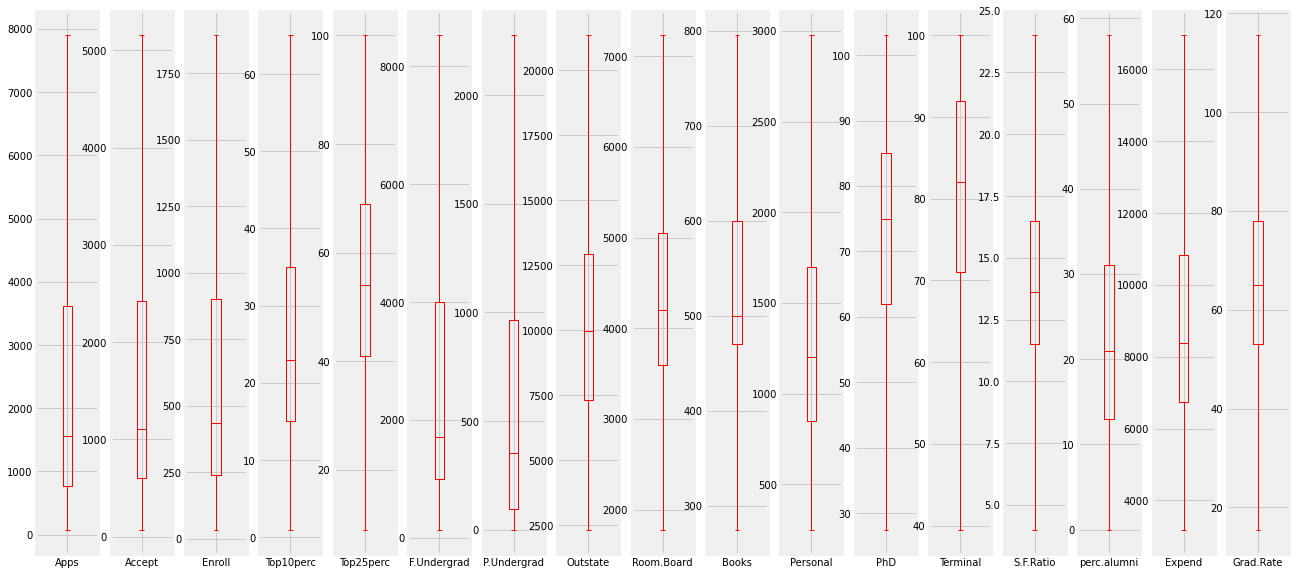

In [48]:
data.iloc[:,1:].plot(kind = 'box', subplots = True,
                  figsize = (20,10), color = 'red');

##### There is no outlier in the dataset as it has been already removed and scaling done.

# 2.5) Build the covariance matrix, eigenvalues, and eigenvector.

### Pricipal Component Analysis(PCA)

In [49]:
# Importing the PCA class from sklearn
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=17) # No.of PCs = No. of features in dataset

In [51]:
data_transformed = pca.fit_transform(scaled_data)

In [52]:
np.round(data_transformed,2)

array([[-1.6 ,  0.99,  0.03, ...,  0.  , -0.03, -0.15],
       [-1.8 , -0.07,  2.12, ..., -0.32, -0.16,  0.19],
       [-1.61, -1.38, -0.5 , ...,  0.07, -0.02,  0.  ],
       ...,
       [-0.58,  0.02,  0.32, ..., -0.16, -0.27,  0.04],
       [ 6.57, -1.18,  1.33, ..., -0.1 ,  0.96, -0.46],
       [-0.48,  1.04, -1.43, ..., -0.01, -0.07, -0.05]])

In [53]:
len(data_transformed) # Same number of rows as original dateset(777)

777

In [54]:
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17']
data_transformed = pd.DataFrame(data_transformed, columns=columns)
np.round(data_transformed,2) # Transformed dateframe with 777 rows & values for 
# each PC instead of values for each original feature in the dataset

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11  PC12  \
0   -1.60  0.99  0.03 -1.01 -0.37 -0.70  0.71  0.90 -0.46 -0.32  0.31  0.19   
1   -1.80 -0.07  2.12  3.14  2.45  0.99 -0.40  0.26  1.13 -0.50  0.17  0.26   
2   -1.61 -1.38 -0.50 -0.04  0.77 -1.03 -0.17 -0.41  0.27 -0.69  0.07 -0.22   
3    2.80 -3.37  0.37 -0.63 -1.19 -1.46 -1.20  0.36  0.71 -0.09 -0.43  0.82   
4   -2.20 -0.10  3.12  0.66 -1.83  0.14 -1.96 -0.15  0.16 -0.03  0.20  0.16   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
772 -3.40  2.00 -0.74  0.80 -0.34  0.57 -0.17  0.10  1.40 -0.11  0.57 -0.04   
773  0.32 -0.31  0.01  0.65  0.46  0.74  0.78 -0.27  0.48  0.70  0.07  0.13   
774 -0.58  0.02  0.32 -0.59  0.18  0.50 -1.46 -0.29 -0.06 -0.49 -0.70  0.17   
775  6.57 -1.18  1.33  0.08  1.37 -0.82  1.20  0.01 -0.01 -0.41 -0.45 -0.06   
776 -0.48  1.04 -1.43 -1.30  0.72  1.05  1.07  0.61  0.66  1.75 -0.19  0.26   

     PC13  PC14  PC15  PC16  PC17  
0    0.19  0.07  0.00 -0.03 -0.15  
1   -0.16  0.19 -0.32 -0.16  0.19  
2    0.17 -0.15  0.07 -0.02  0.00  
3    0.08 -0.05 -0.14 -0.17  0.06  
4   -0.65 -0.27  0.27 -0.05 -0.10  
..    ...   ...   ...   ...   ...  
772 -0.54 -0.29 -0.07  0.10  0.04  
773 -0.28  0.21 -0.18 -0.22 -0.01  
774  0.02  0.05 -0.16 -0.27  0.04  
775 -0.25  0.19 -0.10  0.96 -0.46  
776 -0.27 -0.51 -0.01 -0.07 -0.05  

[777 rows x 17 columns]

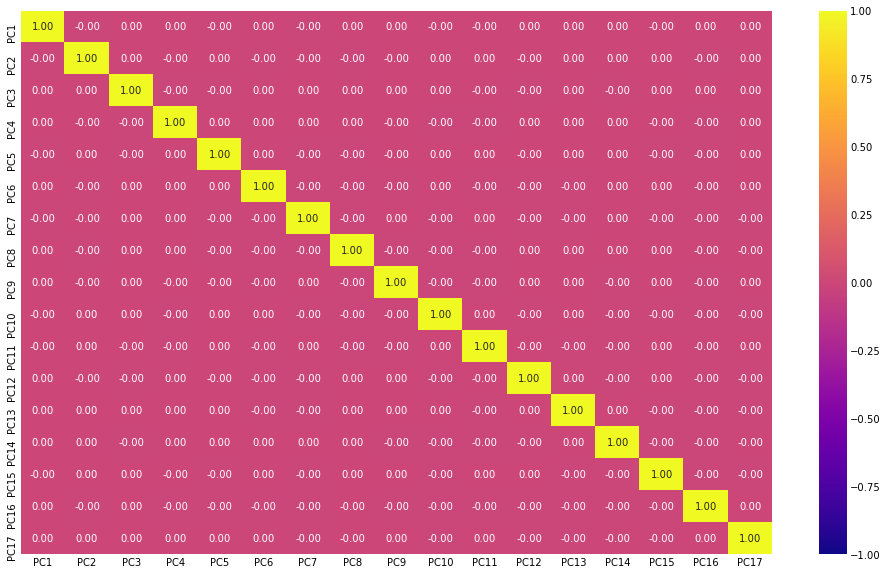

In [55]:
# Show that the PCs are uncorrelated
plt.figure(figsize=(15,10))
sns.heatmap(data_transformed.corr(), vmin = -1,vmax = 1, annot = True,cmap = 'plasma', fmt ='1.2f');

## Covariance Matrix

In [56]:
cov_matrix = np.round(np.cov(scaled_data.T),2)
cov_matrix

array([[ 1.  ,  0.96,  0.9 ,  0.32,  0.36,  0.86,  0.52,  0.07,  0.19,
         0.24,  0.23,  0.46,  0.44,  0.13, -0.1 ,  0.24,  0.15],
       [ 0.96,  1.  ,  0.94,  0.22,  0.27,  0.9 ,  0.57, -0.01,  0.12,
         0.21,  0.26,  0.43,  0.4 ,  0.19, -0.17,  0.16,  0.08],
       [ 0.9 ,  0.94,  1.  ,  0.17,  0.23,  0.97,  0.64, -0.16, -0.02,
         0.2 ,  0.34,  0.38,  0.35,  0.27, -0.22,  0.05, -0.02],
       [ 0.32,  0.22,  0.17,  1.  ,  0.92,  0.11, -0.18,  0.56,  0.36,
         0.15, -0.12,  0.54,  0.51, -0.39,  0.46,  0.66,  0.49],
       [ 0.36,  0.27,  0.23,  0.92,  1.  ,  0.18, -0.1 ,  0.49,  0.33,
         0.17, -0.09,  0.55,  0.53, -0.3 ,  0.42,  0.57,  0.48],
       [ 0.86,  0.9 ,  0.97,  0.11,  0.18,  1.  ,  0.7 , -0.23, -0.05,
         0.21,  0.36,  0.36,  0.34,  0.32, -0.29,  0.  , -0.08],
       [ 0.52,  0.57,  0.64, -0.18, -0.1 ,  0.7 ,  1.  , -0.35, -0.07,
         0.12,  0.34,  0.13,  0.12,  0.37, -0.42, -0.2 , -0.27],
       [ 0.07, -0.01, -0.16,  0.56,  0.49, -0.23

## Eigen vector

In [57]:
np.round(pca.components_,2) #Eigen Vectors

array([[ 0.26,  0.23,  0.19,  0.34,  0.33,  0.16,  0.02,  0.28,  0.24,
         0.1 , -0.04,  0.33,  0.32, -0.16,  0.19,  0.33,  0.24],
       [ 0.31,  0.34,  0.38, -0.1 , -0.06,  0.4 ,  0.36, -0.25, -0.13,
         0.09,  0.23,  0.06,  0.04,  0.26, -0.26, -0.16, -0.17],
       [-0.08, -0.11, -0.09,  0.08,  0.05, -0.07, -0.04, -0.01,  0.02,
         0.7 ,  0.53, -0.08, -0.06, -0.27, -0.1 ,  0.18, -0.25],
       [ 0.1 ,  0.12,  0.01, -0.37, -0.42,  0.01,  0.23,  0.26,  0.58,
        -0.04, -0.11, -0.15, -0.09, -0.26, -0.22,  0.21, -0.04],
       [ 0.22,  0.19,  0.16,  0.16,  0.14,  0.1 , -0.1 ,  0.04, -0.07,
         0.04, -0.  , -0.55, -0.59, -0.14,  0.13, -0.02,  0.36],
       [ 0.  , -0.02, -0.07, -0.09, -0.03, -0.05, -0.02, -0.02,  0.24,
         0.64, -0.38,  0.  ,  0.04,  0.47,  0.01, -0.23,  0.31],
       [-0.03, -0.01, -0.02, -0.26, -0.24, -0.03, -0.01,  0.09,  0.09,
        -0.11,  0.64,  0.09,  0.09,  0.15,  0.39, -0.15,  0.47],
       [-0.09, -0.14, -0.14,  0.29,  0.35, -0.11

# Eigen Values & Interpretation

The `pca` object above also stores the calculated Eigen Values. Each Principal Component has one Eigen Value. The Eigen Values of each Principal Component denote the extent to which the component explains the variation in the dataset.

In [58]:
eigen_value = pca.explained_variance_
np.round(eigen_value,2)

array([5.66, 4.89, 1.13, 1.  , 0.87, 0.77, 0.58, 0.54, 0.42, 0.38, 0.25,
       0.15, 0.13, 0.1 , 0.07, 0.04, 0.02])

**So, the above output means that, PC1 with its Eigen Value of 5.45 explains the variation in dataset equivalent to more than 5 features in the original dataset.**

# 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

In [59]:
np.round(pca.components_,2) #Eigen Vectors

array([[ 0.26,  0.23,  0.19,  0.34,  0.33,  0.16,  0.02,  0.28,  0.24,
         0.1 , -0.04,  0.33,  0.32, -0.16,  0.19,  0.33,  0.24],
       [ 0.31,  0.34,  0.38, -0.1 , -0.06,  0.4 ,  0.36, -0.25, -0.13,
         0.09,  0.23,  0.06,  0.04,  0.26, -0.26, -0.16, -0.17],
       [-0.08, -0.11, -0.09,  0.08,  0.05, -0.07, -0.04, -0.01,  0.02,
         0.7 ,  0.53, -0.08, -0.06, -0.27, -0.1 ,  0.18, -0.25],
       [ 0.1 ,  0.12,  0.01, -0.37, -0.42,  0.01,  0.23,  0.26,  0.58,
        -0.04, -0.11, -0.15, -0.09, -0.26, -0.22,  0.21, -0.04],
       [ 0.22,  0.19,  0.16,  0.16,  0.14,  0.1 , -0.1 ,  0.04, -0.07,
         0.04, -0.  , -0.55, -0.59, -0.14,  0.13, -0.02,  0.36],
       [ 0.  , -0.02, -0.07, -0.09, -0.03, -0.05, -0.02, -0.02,  0.24,
         0.64, -0.38,  0.  ,  0.04,  0.47,  0.01, -0.23,  0.31],
       [-0.03, -0.01, -0.02, -0.26, -0.24, -0.03, -0.01,  0.09,  0.09,
        -0.11,  0.64,  0.09,  0.09,  0.15,  0.39, -0.15,  0.47],
       [-0.09, -0.14, -0.14,  0.29,  0.35, -0.11

So the output above means that:
$ PC_1 = 0.26*Apps + 0.23*Accept + 0.19*Enroll + 0.34*Top10perc+ 0.33*Top25perc + 0.16*F.Undergrad + 0.02*P.Undergrad + 0.28*Outstate + 0.24*Room.Board + 0.01*Books + (-0.04)*Personal + 0.33*PhD + 0.32*Terminal + (-0.16)*S.F.Ratio + 0.19*perc.alumni + 0.33*Expend + 0.24*Grad.Rate $

Similary for the other16 Principal Components, the components can be expressed as a linear combination of the original features from the dataset.

# 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
Perform PCA and export the data of the Principal Component scores into a data frame.

In [60]:
cum_eig_val = np.cumsum(eigen_value)
np.round(cum_eig_val,2) # Cumulative variation explained by PC1,PC2.....PC17

array([ 5.66, 10.56, 11.68, 12.69, 13.56, 14.33, 14.91, 15.45, 15.88,
       16.26, 16.51, 16.65, 16.79, 16.89, 16.96, 17.  , 17.02])

From a cumulative variation explained perspective, we have to take a call or get a mandate from the client, as to how much % explained variation we want to retain even after reducing the dimensions of the original dataset.

Cumulative variance also represents the total no of PCs which equal to total no features.

## The Eigen Values of each Principal Component denote the extent to which the component explains the variation in the dataset.

In [61]:
data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [62]:
pca_vs_features = pd.DataFrame(pca.components_,
                          columns = data.columns[1:],
                          index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
                                   'PC12','PC13','PC14','PC15','PC16','PC17'])
np.round(pca_vs_features,2) # created a dataframe

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
PC1   0.26    0.23    0.19       0.34       0.33         0.16         0.02   
PC2   0.31    0.34    0.38      -0.10      -0.06         0.40         0.36   
PC3  -0.08   -0.11   -0.09       0.08       0.05        -0.07        -0.04   
PC4   0.10    0.12    0.01      -0.37      -0.42         0.01         0.23   
PC5   0.22    0.19    0.16       0.16       0.14         0.10        -0.10   
PC6   0.00   -0.02   -0.07      -0.09      -0.03        -0.05        -0.02   
PC7  -0.03   -0.01   -0.02      -0.26      -0.24        -0.03        -0.01   
PC8  -0.09   -0.14   -0.14       0.29       0.35        -0.11         0.12   
PC9  -0.13   -0.14   -0.05       0.12       0.19        -0.00         0.63   
PC10 -0.16   -0.15   -0.06      -0.04       0.01        -0.00         0.55   
PC11 -0.09   -0.04   -0.04       0.00      -0.10        -0.03         0.25   
PC12 -0.09   -0.16    0.04       0.04      -0.15         0.13        -0.05   
PC13 -0.09   -0.04    0.06      -0.07       0.10         0.09        -0.04   
PC14 -0.55   -0.29    0.42      -0.01       0.01         0.57        -0.15   
PC15  0.01    0.01   -0.05      -0.72       0.66         0.03        -0.04   
PC16  0.60   -0.66   -0.23      -0.02      -0.03         0.37        -0.03   
PC17 -0.18    0.39   -0.72       0.06      -0.02         0.54        -0.03   

      Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
PC1       0.28        0.24   0.10     -0.04  0.33      0.32      -0.16   
PC2      -0.25       -0.13   0.09      0.23  0.06      0.04       0.26   
PC3      -0.01        0.02   0.70      0.53 -0.08     -0.06      -0.27   
PC4       0.26        0.58  -0.04     -0.11 -0.15     -0.09      -0.26   
PC5       0.04       -0.07   0.04     -0.00 -0.55     -0.59      -0.14   
PC6      -0.02        0.24   0.64     -0.38  0.00      0.04       0.47   
PC7       0.09        0.09  -0.11      0.64  0.09      0.09       0.15   
PC8       0.01        0.39  -0.24      0.28 -0.03     -0.09       0.24   
PC9       0.01        0.22  -0.02     -0.02 -0.17     -0.11       0.15   
PC10     -0.23       -0.26   0.09     -0.13  0.10      0.09      -0.47   
PC11      0.59       -0.48   0.04      0.02 -0.04     -0.08       0.36   
PC12     -0.56        0.11  -0.05     -0.01  0.07     -0.16       0.24   
PC13     -0.07       -0.02  -0.04      0.01 -0.70      0.66       0.05   
PC14      0.21        0.10   0.03     -0.03  0.06     -0.10      -0.06   
PC15     -0.00       -0.03  -0.01      0.00  0.08     -0.11       0.00   
PC16      0.08       -0.03  -0.01     -0.00 -0.01      0.02      -0.02   
PC17     -0.00       -0.01  -0.00      0.01 -0.01     -0.01      -0.01   

      perc.alumni  Expend  Grad.Rate  
PC1          0.19    0.33       0.24  
PC2         -0.26   -0.16      -0.17  
PC3         -0.10    0.18      -0.25  
PC4         -0.22    0.21      -0.04  
PC5          0.13   -0.02       0.36  
PC6          0.01   -0.23       0.31  
PC7          0.39   -0.15       0.47  
PC8         -0.57   -0.12       0.18  
PC9          0.54   -0.02      -0.32  
PC10        -0.15   -0.08       0.49  
PC11        -0.17    0.39       0.09  
PC12         0.05    0.69       0.16  
PC13        -0.04    0.13       0.06  
PC14        -0.03   -0.13       0.01  
PC15        -0.01    0.15      -0.00  
PC16         0.00   -0.06      -0.01  
PC17         0.02   -0.01       0.00

In [63]:
# Cumulative Variance explained by the principal components in %
perc_exp_var = cum_eig_val*100/sum(eigen_value)
np.round(perc_exp_var,2)

array([ 33.27,  62.02,  68.64,  74.54,  79.66,  84.16,  87.6 ,  90.79,
        93.28,  95.52,  96.97,  97.84,  98.63,  99.21,  99.65,  99.87,
       100.  ])

**We can see above that the first principal component PC1 to PC5 explains as much as 77% of the variation in the dataset and so on..**

# Dimensionality Reduction

Based on one of the criteria:

**a) variation explained by each PC (its eigen value) or**

**b) cumulative variation explained by the top n number of PCs or**

**c) Mandate from the client/stake holder as to how many PCs the dimension needs to be reduced to**

We can decide on the final number of Pricipal components we will retain, if dimensionality reduction is the objective of doing PCA as it is in this case.

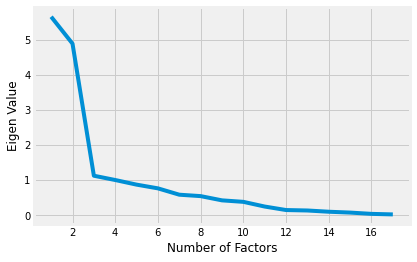

In [64]:
sns.lineplot(x = range(1,18),y = eigen_value);
plt.ylabel('Eigen Value')
plt.xlabel('Number of Factors');

Based on the elbow method, we may decide to go in for 5 PCs as the eigen values are more or less flat after that. Or based on Kaiser Rule consider only those many PCs where each PC has a eigen value of atleast 1. So final number of PCs can be either of 1, 2, 3, 4 or 5 based on this and is a subjective judgement call to be taken.

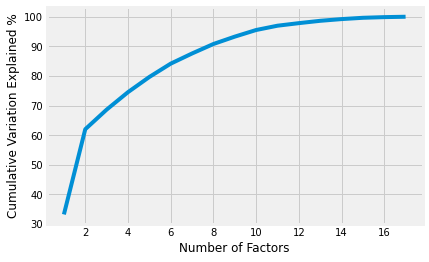

In [65]:
sns.lineplot(x = range(1,18), y = perc_exp_var);
plt.ylabel('Cumulative Variation Explained %')
plt.xlabel('Number of Factors');

From a cumulative variation explained perspective, we have to take a call or get a mandate from the client, as to how much % explained variation we want to retain even after reducing the dimensions of the original dataset. 

In [66]:
# PCA with 3 Principal components
pca =PCA(n_components=3)
data_transformed = pca.fit_transform(scaled_data)

In [67]:
np.round(data_transformed,2) # transformed dataset with 777 rows and 3 columns (3 PCs)

array([[-1.6 ,  0.99,  0.03],
       [-1.8 , -0.07,  2.12],
       [-1.61, -1.38, -0.5 ],
       ...,
       [-0.58,  0.02,  0.32],
       [ 6.57, -1.18,  1.33],
       [-0.48,  1.04, -1.43]])

In [68]:
# convert the above into a DataFrame
data_transformed = pd.DataFrame(data_transformed,
                             columns = ['PC1','PC2','PC3'])

In [69]:
# add back the Names column
data_transformed.insert(loc=0,column='University/Collage',
                     value = data['Names'])

In [75]:
np.round(data_transformed)

University/Collage  PC1  PC2  PC3
0      Abilene Christian University -2.0  1.0  0.0
1                Adelphi University -2.0 -0.0  2.0
2                    Adrian College -2.0 -1.0 -1.0
3               Agnes Scott College  3.0 -3.0  0.0
4         Alaska Pacific University -2.0 -0.0  3.0
..                              ...  ...  ...  ...
772         Worcester State College -3.0  2.0 -1.0
773               Xavier University  0.0 -0.0  0.0
774  Xavier University of Louisiana -1.0  0.0  0.0
775                 Yale University  7.0 -1.0  1.0
776    York College of Pennsylvania -0.0  1.0 -1.0

[777 rows x 4 columns]

# Single Composite Score to Rate University/ Collage

In [76]:
data_transformed = data_transformed.drop(['PC2','PC3'], axis = 1)

In [77]:
np.round(data_transformed)

University/Collage  PC1
0      Abilene Christian University -2.0
1                Adelphi University -2.0
2                    Adrian College -2.0
3               Agnes Scott College  3.0
4         Alaska Pacific University -2.0
..                              ...  ...
772         Worcester State College -3.0
773               Xavier University  0.0
774  Xavier University of Louisiana -1.0
775                 Yale University  7.0
776    York College of Pennsylvania -0.0

[777 rows x 2 columns]

In [78]:
university_ranking = data_transformed.sort_values(by = 'PC1',
                                            ascending=False)
# to display all the rows without ....
# pd.options.display.max_rows = 800
university_ranking

University/Collage       PC1
663    University of Pennsylvania  6.995931
174               Duke University  6.666004
70               Brown University  6.579843
775               Yale University  6.570952
424       Northwestern University  6.547896
..                            ...       ...
739    West Liberty State College -4.472576
717              Voorhees College -4.743873
706  Valley City State University -4.849216
264              Huron University -5.198380
226         Goldey Beacom College -5.399500

[777 rows x 2 columns]

# 2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

# Conclusion:

**1) We have developed as required a single composite score for each university/ collage which captures most of the details of the 17 evaluation parameters('Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate') into a single score.**

**2) We have sorted the university/ collage in decreasing order from highest composite score to the lowest.**

**3) Students and researchers can use this sorted list to target the best university/ collage they want to select for their future study.**

**Happy Learning !!**